## Part 2 c) Random Forest - UnderSampling

#### 1. load clean data

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = '/content/drive/MyDrive/8. Library/0. UTS/Master of Information Technology/4. Subjects/2021 Semester 1/32130 Fundamentals of Data Analystics/4. Assignment/Assignment 3/Database/A3_UnderSample_train.csv'
a3train = pd.read_csv(DATAFILE1)
a3train = a3train[[col for col in a3train.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]
a3train.head()

,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,Personal_info2,Personal_info4,Property_info1,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info3,Geographic_info4,Field_1_A,Field_1_B,Field_1_C,Field_1_D,Field_1_E,Field_1_F,Field_1_J,Field_1_K,"Field_3_1,113","Field_3_1,165","Field_3_1,480","Field_3_1,487",Field_3_548,Field_3_564,Field_3_935,Field_3_965,Cover_1_A,Cover_1_B,Cover_1_C,Cover_1_D,Cover_1_E,Cover_1_F,...,Personal_3_ZF,Personal_3_ZG,Personal_3_ZH,Personal_3_ZJ,Personal_3_ZK,Personal_3_ZN,Personal_3_ZR,Personal_3_ZT,Personal_3_ZU,Personal_3_ZV,Personal_3_ZW,Personal_5_1.0,Personal_5_2.0,Personal_5_3.0,Personal_5_4.0,Personal_5_5.0,Property_3_A,Property_3_D,Property_3_E,Property_3_F,Property_3_G,Property_3_H,Property_3_I,Property_3_J,Property_3_K,Property_3_L,Property_3_M,Property_3_N,Property_3_O,Property_3_P,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,1.042384,0,2.869871,0.161749,1,0.793684,1.430736,1.086410,0,0.757145,-0.02182,1,0,0.972882,0.934965,-0.913095,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.070547,-0.589215,0
1,1.679706,0,-0.538132,0.161749,1,0.793684,-0.475199,-1.300374,0,1.500418,-0.02182,0,1,-0.413997,-0.478020,0.543660,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1.684170,1.777352,0
2,0.815541,0,-0.896869,0.161749,1,-1.252022,0.954253,-1.665920,0,-1.175365,-0.02182,0,1,-1.246125,-0.478020,1.272038,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.306811,0.594068,0
3,0.831744,0,-0.538132,-3.910702,1,-2.274875,-1.745822,0.726704,0,-1.175365,-0.02182,0,1,-1.384812,0.793667,-0.913095,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.070547,-0.293394,0
4,0.053995,0,1.434923,0.161749,1,-1.252022,0.954253,1.554985,0,-0.432092,-0.02182,1,0,1.250258,-0.760617,-0.767419,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,-1.070547,1.185710,0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2. parameter optimization `GridSearchCV`

In [4]:
X_train, y_train = a3train.iloc[:,:-1], a3train.iloc[:,-1]

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

n_estimators = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
est_model = RandomForestClassifier()
random_grid = {'n_estimators':n_estimators,
               'criterion': criterion, 
                'min_samples_leaf': min_samples_leaf,
                }

cv_Gird = GridSearchCV(estimator = est_model, param_grid = random_grid, 
                       scoring = make_scorer(f1_score,pos_label=1), cv = 3, verbose = 2)
cv_Gird.fit(X_train, y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV] criterion=gini, min_samples_leaf=1, n_estimators=5 ..............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=5, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=5 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, min_samples_leaf=1, n_estimators=5, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=5 ..............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=5, total=   0.1s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=10 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=10, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=10 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=10, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=10 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=10, total=   0.2s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=15 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=15, total=   0.3s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=15 .............
[CV]  criterion=gini, min_samples_leaf=1, n_estimators=15, total=   0.3s
[CV] criterion=gini, min_samples_leaf=1, n_estimators=15 ........

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed: 26.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [6]:
print(cv_Gird.best_params_)
print(cv_Gird.best_score_)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 85}
0.8260962434788265


#### 3. build classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 85, criterion = 'entropy', min_samples_leaf= 1)
clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=85)

#### 4. generate `f1-score` for evaluation

In [ ]:
# import test set and fit in to classifier
DATAFILE2 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3_test.csv'
a3test = pd.read_csv(DATAFILE2)
a3test = a3test[[col for col in a3test.columns if (col != 'Unnamed: 0' and col != 'Quote_Id')]]

X_test, y_test = a3test.iloc[:,:-1], a3test.iloc[:,-1]
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     12629
           1       0.48      0.86      0.62      3006

    accuracy                           0.80     15635
   macro avg       0.72      0.82      0.74     15635
weighted avg       0.87      0.80      0.81     15635

The F1-score for Quote_Flag = 1 is 0.6180
[[9866 2763]
 [ 426 2580]]


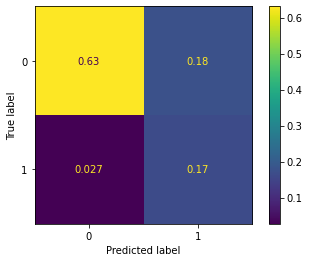

In [ ]:
# generate reposrting score

from sklearn.metrics import f1_score, classification_report, confusion_matrix,plot_confusion_matrix
# Classification Report and f1-score
print(classification_report(y_test, y_pred))
print('The F1-score for Quote_Flag = 1 is {:.4f}'.format(f1_score(y_test, y_pred, pos_label=1)))
# Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
print(mat)
plot_confusion_matrix(clf, X_test, y_test, normalize = 'all');


### AUC for kaggle
To save time, AUC performance needs to be checked before use to predict for kaggle.
Only AUC > 0.85 worth for kaggle

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# auc
y_probs_class_1 = y_probs[:,1]
auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc))

The AUC is 0.892


In [ ]:
# import the unknown data and fit in the classifier for prediction

DATAFILE3 = 'C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\a3k-clean_m.csv'
a3kaggle = pd.read_csv(DATAFILE3)
a3kaggle1 = a3kaggle[[col for col in a3kaggle.columns if col != 'Unnamed: 0' and col != 'Quote_Id']]

y_pred_K = clf.predict(a3kaggle1)

In [ ]:
dummy_list = []
for i in y_pred_K:
    dummy_list = np.append(dummy_list, i)

data = {
    'Quote_Id': a3kaggle['Quote_Id'],
    'Quote_Flag': dummy_list
    }
df = pd.DataFrame(data)

In [ ]:
df.head()

,Quote_Id,Quote_Flag
0,1,0.0
1,4,0.0
2,5,0.0
3,7,0.0
4,8,0.0


In [ ]:
df.to_csv('C:\\Users\\ASUS\\32130_FDA_a3\\Kaggle\\UTS_32130_10620084.csv')